<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 4 / SPRINT 2 / NOTE 1*

# 📝 Assignment

---


# Count-based_Representation

indeed.com 에서 Data Scientist 키워드로 Job descrition을 찾아 스크래핑한 데이터를 이용해 과제를 진행해 보겠습니다.

[Data_Scienties.csv](https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv) 파일에는 1300여개의 Data Scientist job description 정보가 담겨 있습니다.

## 1. 데이터 전처리 (Text preprocessing)

In [69]:
import re
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 0) 텍스트 분석에 앞서 데이터 전처리를 진행합니다.

- 파일을 불러온 후 title, company, description 에 해당하는 Column만 남겨주세요.
- 중복값을 제거하세요.

In [70]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv')

In [71]:
df = df[['title','company','description']]
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

### 1) 토큰을 정제합니다.

- 문자를 소문자로 통일
- 분석에 관련 없는 정보 제거
- 이번 과제는 `spacy` 로부터 `"en_core_web_sm"` 을 로드하여 진행해주세요.

- **문항 1) 대문자를 소문자로 변경하는 함수를 입력하세요.**
- **문항 2) 정규 표현식을 사용하여 re 라이브러리에서 알파벳 소문자, 숫자만 받을 수 있는 코드를 작성하세요.**

In [72]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

In [73]:
df = df.applymap(lambda x: x.lower().replace('\n',' '))

In [74]:
def to_token(col):
  tokens = []
  for doc in tokenizer.pipe(df[col]):
    doc_tokens = [re.sub(r"[^a-z0-9 ]",'',token.text) for token in doc]
    tokens.append(doc_tokens)
  return tokens

df_temp = df.copy()
cols = df.columns

for col in cols:
  df_temp[col+"_tokens"] = to_token(col)

df_temp['description_tokens'].tail(1)

756    [tldr, spring, is, accelerating, the, discover...
Name: description_tokens, dtype: object

In [75]:
df_temp

,title,company,description,title_tokens,company_tokens,description_tokens
0,data scientist (structured products),equitrust life insurance company,job details description essential duties and r...,"[data, scientist, structured, products]","[equitrust, life, insurance, company]","[job, details, description, essential, duties,..."
1,"specialist, data science",nationwide,as a team member in the finance and internal a...,"[specialist, data, science]",[nationwide],"[as, a, team, member, in, the, finance, and, i..."
2,sr. data scientist (remote),american credit acceptance,overview: american credit acceptance seeks a h...,"[sr, data, scientist, remote]","[american, credit, acceptance]","[overview, american, credit, acceptance, seeks..."
3,data scientist associate sr (dads06) btb - leg...,"jpmorgan chase bank, n.a.",j.p. morgan's corporate & investment bank (cib...,"[data, scientist, associate, sr, dads06, btb, ...","[jpmorgan, chase, bank, na]","[jp, morgans, corporate, , investment, bank, c..."
4,data scientist,vystar credit union,"at vystar, we offer competitive pay, an excell...","[data, scientist]","[vystar, credit, union]","[at, vystar, we, offer, competitive, pay, an, ..."
...,...,...,...,...,...,...
752,senior data analyst,intuit,our expert delivery & business intelligence te...,"[senior, data, analyst]",[intuit],"[our, expert, delivery, , business, intelligen..."
753,"senior / data scientist, advertising business",spotify,"music for everyone, no credit card needed. it’...","[senior, , data, scientist, advertising, busin...",[spotify],"[music, for, everyone, no, credit, card, neede..."
754,senior data & applied scientist,microsoft,senior data & applied scientist do you have a ...,"[senior, data, , applied, scientist]",[microsoft],"[senior, data, , applied, scientist, do, you, ..."
755,senior data scientist,ebay inc.,ebay is a global commerce leader that allows y...,"[senior, data, scientist]","[ebay, inc]","[ebay, is, a, global, commerce, leader, that, ..."


### 2) 정제한 토큰을 시각화 합니다.

- Top 10 토큰을 프린트 합니다.
- 토큰의 수, 빈도 순위, 존재 문서 수, 비율 등 정보를 계산합니다.
- 토큰 순위에 따른 퍼센트 누적 분포 그래프를 시각화합니다.

- **문항 3) 추천 토큰 순위 10개 단어를 입력하세요.**

In [76]:
from collections import Counter

word_counts = Counter()

df_temp['description_tokens'].apply(lambda x: word_counts.update(x))

word_counts.most_common(10)

[('and', 21864),
 ('to', 12694),
 ('the', 10538),
 ('of', 8839),
 ('data', 7425),
 ('in', 6769),
 ('a', 6436),
 ('with', 5727),
 ('for', 4132),
 (' ', 4022)]

In [77]:
def word_count(docs):
    """ 토큰화된 문서들을 입력받아 토큰을 카운트 하고 관련된 속성을 가진 데이터프레임을 리턴합니다.
    Args:
        docs (series or list): 토큰화된 문서가 들어있는 list
    Returns:
        list: Dataframe
    """
    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

wc = word_count(df_temp['description_tokens'])
wc.head()

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
187,and,755,21864,1.0,0.055544,0.055544,0.997358
44,to,754,12694,2.0,0.032248,0.087793,0.996037
199,the,745,10538,3.0,0.026771,0.114564,0.984148
80,of,745,8839,4.0,0.022455,0.137019,0.984148
36,data,740,7425,5.0,0.018863,0.155882,0.977543


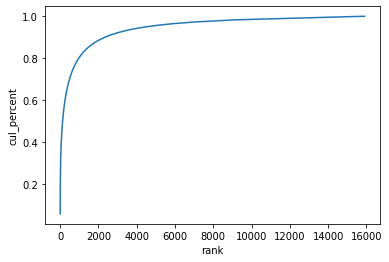

In [78]:
import seaborn as sns

sns.lineplot(x='rank', y='cul_percent', data=wc);

### 4) 확장된 불용어 사전을 사용해 토큰을 정제합니다.


- **문항 4) 기본 불용어 사전에 두 단어(`"data", "work"`)를 추가하는 코드를 사용해주세요.**
- **문항 5) 불용어를 제거하고 난 뒤 토큰 순위 10개의 단어를 입력하세요.**

In [79]:
STOP_WORDS = nlp.Defaults.stop_words.union(["data","work"])

In [80]:
tokens = []

for doc in tokenizer.pipe(df['description']):
  doc_tokens = [re.sub(r"[^a-z0-9]","",token.text) for token in doc if token.text not in STOP_WORDS]
  tokens.append(doc_tokens)

df_temp['nlp_description'] = tokens

In [81]:
df_temp

,title,company,description,title_tokens,company_tokens,description_tokens,nlp_description
0,data scientist (structured products),equitrust life insurance company,job details description essential duties and r...,"[data, scientist, structured, products]","[equitrust, life, insurance, company]","[job, details, description, essential, duties,...","[job, details, description, essential, duties,..."
1,"specialist, data science",nationwide,as a team member in the finance and internal a...,"[specialist, data, science]",[nationwide],"[as, a, team, member, in, the, finance, and, i...","[team, member, finance, internal, audit, depar..."
2,sr. data scientist (remote),american credit acceptance,overview: american credit acceptance seeks a h...,"[sr, data, scientist, remote]","[american, credit, acceptance]","[overview, american, credit, acceptance, seeks...","[overview, american, credit, acceptance, seeks..."
3,data scientist associate sr (dads06) btb - leg...,"jpmorgan chase bank, n.a.",j.p. morgan's corporate & investment bank (cib...,"[data, scientist, associate, sr, dads06, btb, ...","[jpmorgan, chase, bank, na]","[jp, morgans, corporate, , investment, bank, c...","[jp, morgans, corporate, , investment, bank, c..."
4,data scientist,vystar credit union,"at vystar, we offer competitive pay, an excell...","[data, scientist]","[vystar, credit, union]","[at, vystar, we, offer, competitive, pay, an, ...","[vystar, offer, competitive, pay, excellent, b..."
...,...,...,...,...,...,...,...
752,senior data analyst,intuit,our expert delivery & business intelligence te...,"[senior, data, analyst]",[intuit],"[our, expert, delivery, , business, intelligen...","[expert, delivery, , business, intelligence, t..."
753,"senior / data scientist, advertising business",spotify,"music for everyone, no credit card needed. it’...","[senior, , data, scientist, advertising, busin...",[spotify],"[music, for, everyone, no, credit, card, neede...","[music, everyone, credit, card, needed, its, p..."
754,senior data & applied scientist,microsoft,senior data & applied scientist do you have a ...,"[senior, data, , applied, scientist]",[microsoft],"[senior, data, , applied, scientist, do, you, ...","[senior, , applied, scientist, passion, machin..."
755,senior data scientist,ebay inc.,ebay is a global commerce leader that allows y...,"[senior, data, scientist]","[ebay, inc]","[ebay, is, a, global, commerce, leader, that, ...","[ebay, global, commerce, leader, allows, shape..."


In [82]:
word_counts = Counter()

df_temp['nlp_description'].apply(lambda x: word_counts.update(x))

word_counts.most_common(10)

[('', 6355),
 ('experience', 3450),
 ('business', 2064),
 ('science', 1648),
 ('team', 1625),
 ('learning', 1596),
 ('analysis', 1349),
 ('skills', 1251),
 ('machine', 1152),
 ('analytics', 1136)]

### 5) Lemmatization 사용 효과를 분석해 봅니다.



- **문항 6) Lemmatization을 진행한 뒤 상위 10개 단어를 입력하세요.**

In [83]:
def get_lemmas(text):

    lemmas = []
    text_edit = ''
    for item in text:
      text_edit += ' '+item
      text_edit = text_edit.lstrip()
    doc = nlp(text_edit)

    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [84]:
df_temp['lemmas'] = df_temp['nlp_description'].apply(get_lemmas)
df_temp['lemmas']

0      [job, detail, description, essential, duty, re...
1      [team, member, finance, internal, audit, depar...
2      [overview, american, credit, acceptance, seek,...
3      [jp, morgans, corporate,  , investment, bank, ...
4      [vystar, offer, competitive, pay, excellent, b...
                             ...                        
752    [expert, delivery,  , business, intelligence, ...
753    [music, credit, card, need, promise, platform,...
754    [senior,  , apply, scientist, passion, machine...
755    [ebay, global, commerce, leader, allow, shape,...
756    [tldr, spring, accelerate, discovery, therapy,...
Name: lemmas, Length: 757, dtype: object

In [85]:
word_counts = Counter()

df_temp['lemmas'].apply(lambda x: word_counts.update(x))

word_counts.most_common(10)

[(' ', 6179),
 ('experience', 3640),
 ('team', 2298),
 ('business', 2157),
 ('science', 1706),
 ('analysis', 1556),
 ('model', 1525),
 ('analytic', 1375),
 ('skill', 1303),
 ('product', 1287)]

## 2. 유사한 문서 찾기

### 1) `TfidfVectorizer`를 이용해 각 문서들을 벡터화 한 후 KNN 모델을 만들고, <br/> 내가 원하는 `job description`을 질의해 가장 가까운 검색 결과들을 가져오고 분석합니다.

- **문항 9) 88번 index의 `job description`와 5개의 가장 유사한 `job description`이 있는 index를 입력하세요.**
    - 답은 88번 인덱스를 포함합니다.
    - `max_features = 3000` 으로 설정합니다.
    - [88, 90, 91, 93, 94] 형태로 답을 입력해주세요

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tokenize(document):
    doc = nlp(document)
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True) and (token.is_alpha == True)]

tfidf_tuned = TfidfVectorizer(stop_words='english',
                              tokenizer=tokenize,
                              max_features=3000,
                              ngram_range=(1,3)

                       )

dtm_tfidf_tuned = tfidf_tuned.fit_transform(df['description'])
dtm_tfidf_tuned = pd.DataFrame(dtm_tfidf_tuned.todense(), columns=tfidf_tuned.get_feature_names())
dtm_tfidf_tuned.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ability,ability communicate,ability develop,ability effectively,ability obtain,ability work,ability work independently,ability write,able,able work,...,year industry experience,year professional,year professional experience,year relevant,year relevant experience,year work,year work experience,yes,york,zillow
0,0.078733,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1,0.065720,0.065107,0.0,0.0,0.0,0.0,0.0,0.0,0.032401,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
2,0.053370,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.041475,0.00000,0.0,0.0,0.0,0.0,0.0
3,0.046073,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.035805,0.04475,0.0,0.0,0.0,0.0,0.0
4,0.019959,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0


In [87]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm_tfidf_tuned)

NearestNeighbors(algorithm='kd_tree')

In [88]:
nn.kneighbors([dtm_tfidf_tuned.iloc[88]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"


(array([[0.        , 1.15816716, 1.16883946, 1.1877693 , 1.20594477]]),
 array([[ 88,  40, 221,  68,  79]]))

## 3. TF-IDF 이용한 텍스트 분류 진행하기

TF-IDF를 이용해 문장 혹은 문서를 벡터화한 경우, 이 벡터값을 이용해 문서 분류 태스크를 진행할 수 있습니다. 

현재 다루고 있는 데이터셋에는 label이 존재하지 않으므로, title 컬럼에 "Senior"가 있는지 없는지 여부를 통해 Senior 직무 여부를 분류하는 작업을 진행해보겠습니다.

In [89]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv')

df = df[['title','company','description']]
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

### 1) title 컬럼에 "Senior" 문자열이 있으면 1, 없으면 0인 "Senior"라는 새로운 컬럼을 생성해주세요.

문항 7) 새롭게 만든 Senior 컬럼에서 값이 1인 (Senior O) 데이터의 개수는?

In [90]:
df['senior'] = df['title'].apply(lambda x: 1 if 'Senior' in x else 0)

In [91]:
df['senior'].value_counts()

0    662
1     95
Name: senior, dtype: int64

문항 8) sklearn의 `train_test_split`을 통해 train 데이터와 valid 데이터로 나눈 후, `sklearn`의 `DecisionTreeClassifier`를 이용해 분류를 진행해주세요. 

단, x값은 위에서 학습한 dtm_tfidf를 그대로 이용해주세요. train_test_split과 DecisionTreeClassifier의 random_state을 42로 고정하고, test_size는 0.1로 설정해주세요.

학습을 완료한 후, test 데이터에 대한 예측을 진행하고 label 1에 대한 precision과 recall 값을 적어주세요

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(dtm_tfidf_tuned, df['senior'],test_size=0.1, stratify=df['senior'], random_state=42)

In [95]:
X_train

,ability,ability communicate,ability develop,ability effectively,ability obtain,ability work,ability work independently,ability write,able,able work,...,year industry experience,year professional,year professional experience,year relevant,year relevant experience,year work,year work experience,yes,york,zillow
161,0.023350,0.0,0.0,0.0,0.0,0.046191,0.0,0.0,0.080581,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
436,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
656,0.022069,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.038080,0.064304,...,0.0,0.0,0.0,0.000000,0.000000,0.058718,0.063793,0.000000,0.0,0.0
66,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
254,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
573,0.113492,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
190,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.043931,0.000000,0.000000,0.000000,0.000000,0.0,0.0
328,0.026890,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score

DTC = DecisionTreeClassifier(criterion='gini', 
                             max_depth=None,
                             max_features="auto",
                             random_state=42, 
                             class_weight=None,
                            )
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_val)

print("precision :", precision_score(y_val, y_pred))
print("recall :", recall_score(y_val, y_pred))

precision : 0.4166666666666667
recall : 0.5
